# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Your code here
data = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week8\Day2\11. Problem_in_ML\boston_data.csv')

In [13]:
data.shape

(404, 14)

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
#All data are numerical
data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [5]:
#There should be no missing data 
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


<AxesSubplot:>

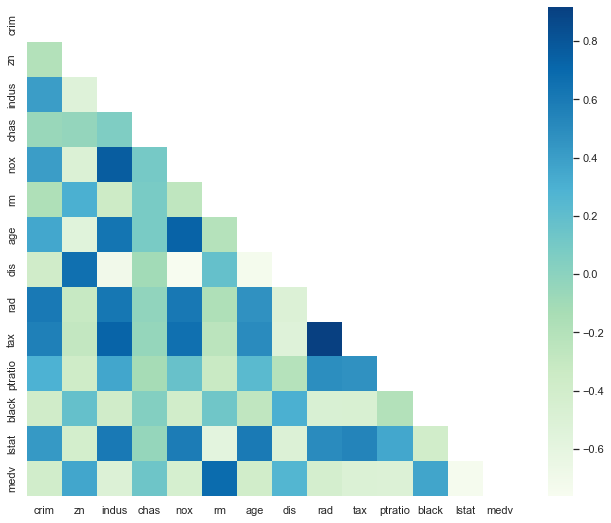

In [9]:
#Let's look at the correlation matrix
sns.set_theme(style="white")
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='GnBu')

In [ ]:
#Columns tax and rad mmight be highly correlated 
#the highest correlation of our target 'medv'and 'rm' column 

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


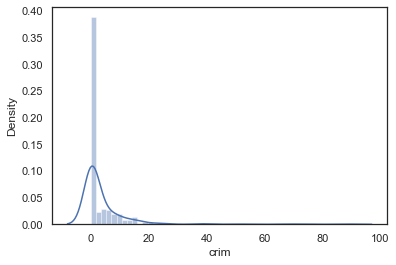

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


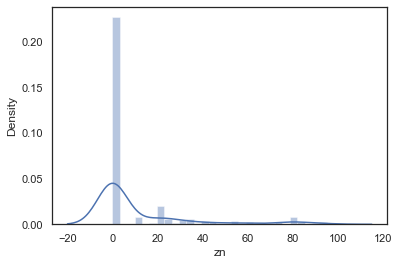

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


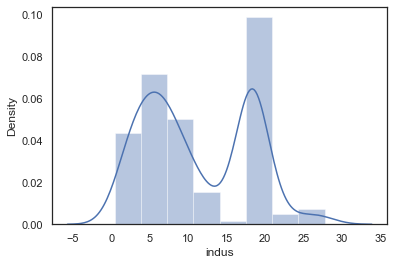

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


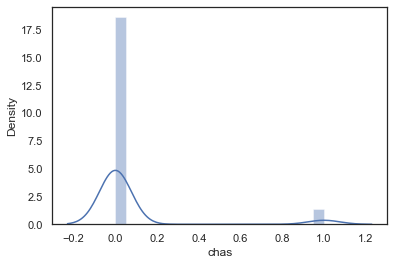

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


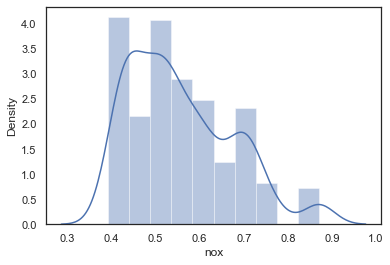

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


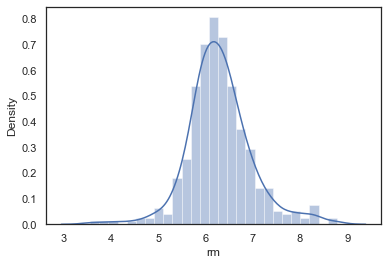

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


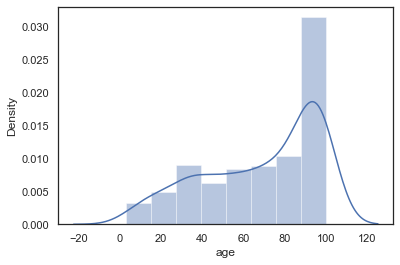

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


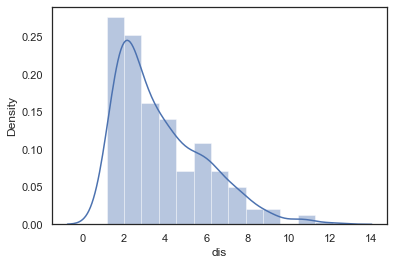

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


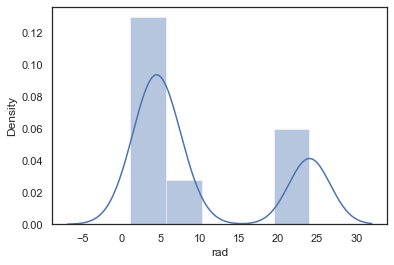

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


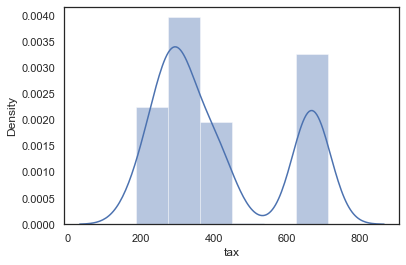

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


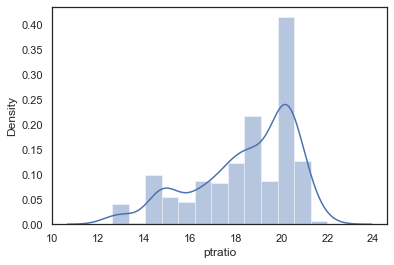

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


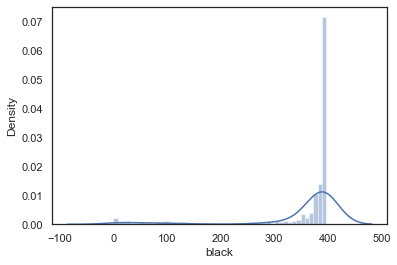

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


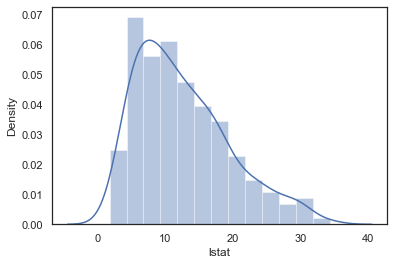

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


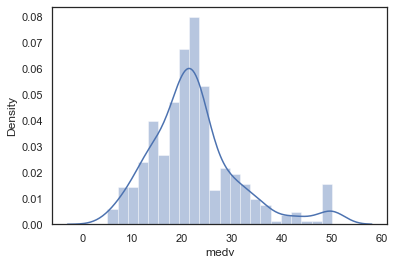

In [11]:
#Lets look at the distribution of each column 
for col in data.columns:
	sns.distplot(data[col],hist=True)
	plt.xlabel(col)
	plt.show()

<AxesSubplot:>

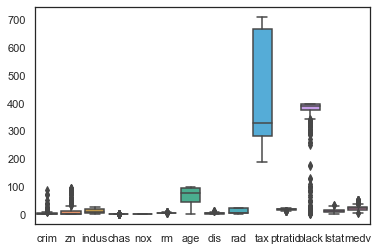

In [12]:
#And now I will look for outliers:
sns.boxplot(data=data)

In [18]:
#The graph above is not clear I will look for outliers diffrently
#Now I will try to deal with outliers
stats = data.describe().transpose()

stats['IQR'] = stats['75%'] - stats['25%']
outliers = pd.DataFrame(columns=data.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 6
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

In [19]:
outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Outlier
34,38.35180,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0,crim
114,67.92080,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,crim
116,41.52920,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5,crim
273,37.66190,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9,crim
285,73.53410,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,crim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,9.51363,0.0,18.1,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9,black
355,14.42080,0.0,18.1,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6,black
374,7.36711,0.0,18.1,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,11.0,black
383,5.58107,0.0,18.1,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22,14.3,black


In [ ]:
#It looks taht there are a lot of points that moight be classified as outlier. I tried diffrent coefficients for cutoff and the number of rows which quqlify qs outliers is still big. Thus I will leave the data as it is, not too lose to much data.

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

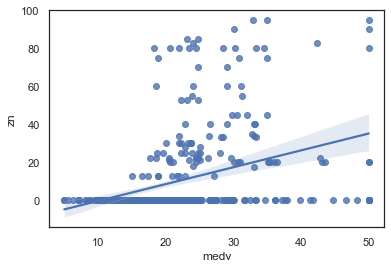

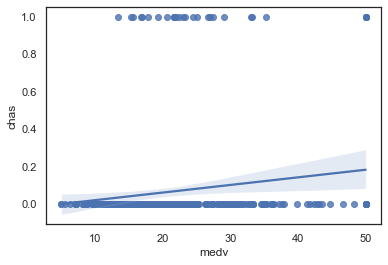

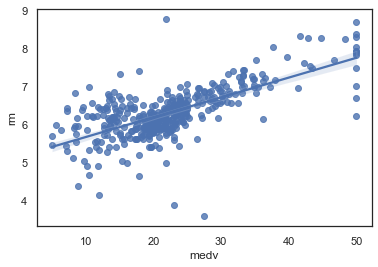

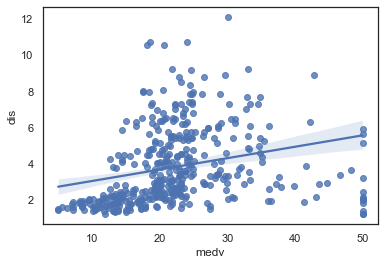

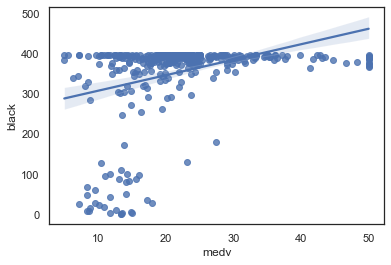

In [21]:
# Your plots here
# from the correlation matrix above it looks that there might be a high correlation between medv and columns: zn, chas, rm, dis and black.
# The graphs below show this relations:
for name in ['zn', 'chas', 'rm', 'dis','black']:
	sns.regplot(x='medv', y=name, data=data)
	plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
# I see a positive correlation between rm, dis and the price, which means that if the proce increases then the values of rm and dis increase as well

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

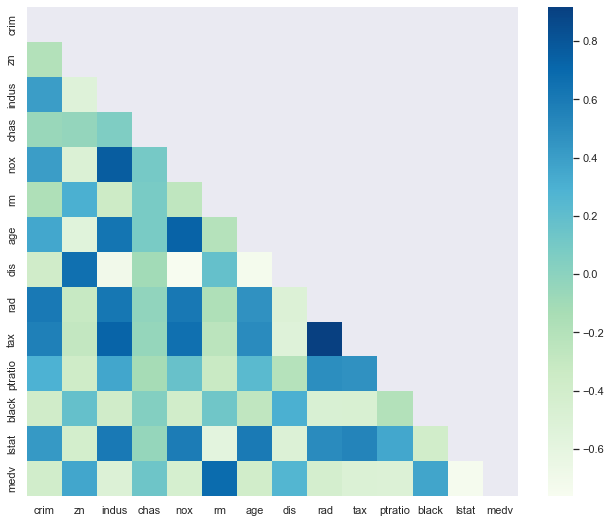

In [23]:
# Your response here
# I actually created a heatmap aboce so I know that there is a positive correlation between medv and zn, chas, rm, dis and black
sns.set_theme(style="darkgrid")
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='GnBu')

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [27]:
# Your code here
# All of these parameters are in the describe function
data['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [86]:
from sklearn.metrics import r2_score,

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = r2_score(y_true, y_predict)
    return result


### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [30]:
# Your code here

from sklearn.model_selection import train_test_split


y = data['medv']
x = data.drop(labels='medv', axis=1)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state = 15)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [33]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

max_depth = [2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
	rfr = RandomForestRegressor(max_depth=num)
	rfr.fit(x_train, y_train)
	key = 'rfr_depth' + str(num)
	y_predictions_train[key]= rfr.predict(x_train)
	y_predictions_test[key]= rfr.predict(x_test)

Now, plot the score for each tree on the training set and on the testing set.

In [87]:
# Produce a plot with the score for the testing and training for the different max depths
# First I calculate performance metrics for each tarin and test

trains_scores = []
for key in y_predictions_train:
	trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
	test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))




In [88]:
df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)

<AxesSubplot:>

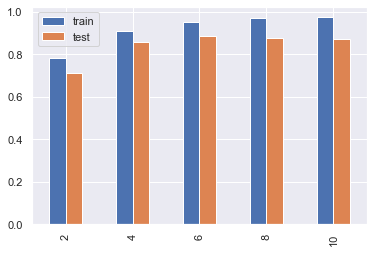

In [89]:
df_score.plot.bar()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# The r2 score describes how well the model described the data. the maximum value fo that parameter is 1. It can be observed taht the valeus of r2 score increase with the increase of depth for train. For test this value increases till the depth 6 and then it starts decreasing

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [90]:
from sklearn.metrics import explained_variance_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = explained_variance_score(y_true, y_predict)
    return result

<AxesSubplot:>

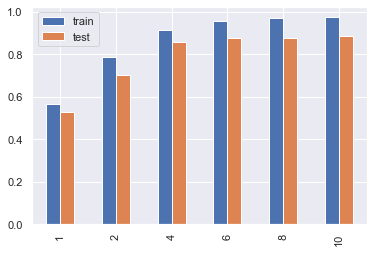

In [93]:
#Explained_variance_score
max_depth = [1,2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
	rfr = RandomForestRegressor(max_depth=num)
	rfr.fit(x_train, y_train)
	key = 'rfr_depth' + str(num)
	y_predictions_train[key]= rfr.predict(x_train)
	y_predictions_test[key]= rfr.predict(x_test)

trains_scores = []
for key in y_predictions_train:
	trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
	test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)
df_score.plot.bar()


In [94]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = mean_squared_error(y_true, y_predict)
    return result

<AxesSubplot:>

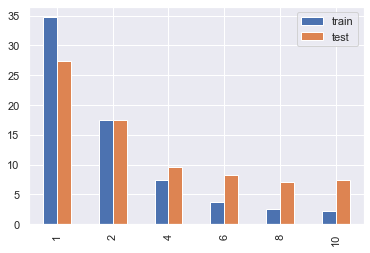

In [96]:
#Mean Squared Error
max_depth = [1,2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
	rfr = RandomForestRegressor(max_depth=num)
	rfr.fit(x_train, y_train)
	key = 'rfr_depth' + str(num)
	y_predictions_train[key]= rfr.predict(x_train)
	y_predictions_test[key]= rfr.predict(x_test)

trains_scores = []
for key in y_predictions_train:
	trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
	test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)
df_score.plot.bar()

In [ ]:
# Your response here
# In order to get more inside into that ssue  I recalculated the models for both explained_variance_score ans mean square errors
# I would say that the max_depth of 1 means that there is hjigh bias while high max_depth means high variance. For me this is the most clearly shown by the mean squared error graph. 

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
# Basing on the garphs above I would say the best max_depth is somewhere in the middle between 1 and 10, maybe closer to 4.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [98]:
# Your response here
'''
Data from almost 50 years ago is not very relevant as a lot of parmetrs changed including market prices of houses. Nevertheless there are some parametres/features that still will influence house prices now, for example number of rooms.
I would assume that with the correct parameters model is robust, but it is applicable only to urban cities. The house prices in rural cities are probably influenced by other factors than prices in urban cities.
'''

'\nData from almost 50 years ago is not very relevant as a lot of parmetrs changed including market prices of houses. Nevertheless there are some parametres/features that still will influence house prices now, for example number of rooms.\nI would assume that with the correct parameters model is robust, but it is applicable only to urban cities. The house prices in rural cities are probably influenced by other factors than prices in urban cities.\n'